# Class Statistics for 
## A) Each Annotation Type of the Fine-tuning Datasets
## B) Node and Edge Types in the Overall Dataset

This notebook generates A) class distribution plots for the labels of each of the different fine-tuning datasets, which were previously filtered by their majority classes. Here, the IDs are manually mapped to the respective textual descriptors, based on their ontologies. B) distribution plots for the node and edge types of the initial KG (i.e., prior to splitting it into pre-training and finetuning).

In [2]:
# Imports 
import getpass
import os
import sys
import time

import json
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from stonkgs.constants import (
    CELL_LINE_DIR,
    CELL_TYPE_DIR,
    DISEASE_DIR,
    LOCATION_DIR,
    MISC_DIR,
    ORGAN_DIR,
    SPECIES_DIR,
    VISUALIZATIONS_DIR,
)

Record user details

In [2]:
print(getpass.getuser())
print(sys.version)
print(time.asctime())

hbalabin
3.8.8 (default, Feb 24 2021, 21:46:12) 
[GCC 7.3.0]
Wed May 12 22:16:26 2021


## 1. Load all the filtered datasets
Fine-tuning

In [3]:
# Load all the dataframes
cell_line_df = pd.read_csv(os.path.join(CELL_LINE_DIR, 'cell_line_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
cell_type_df = pd.read_csv(os.path.join(CELL_TYPE_DIR, 'cell_type_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
disease_df = pd.read_csv(os.path.join(DISEASE_DIR, 'disease_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
location_df = pd.read_csv(os.path.join(LOCATION_DIR, 'location_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
organ_df = pd.read_csv(os.path.join(ORGAN_DIR, 'organ_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})
species_df = pd.read_csv(os.path.join(SPECIES_DIR, 'species_filtered.tsv'), sep='\t', converters={'class': lambda x: str(x)})

all_dfs = [
    cell_line_df, 
    cell_type_df, 
    disease_df, 
    location_df, 
    organ_df, 
    species_df,
]

General statistics

In [95]:
with open(os.path.join(MISC_DIR, 'indra_kg_overview_summary.json')) as f:
    statistics_dict = json.load(f)

In [96]:
node_types = [i for i in statistics_dict if i['name'] == 'functions_summary'][0]['value']
relation_types = [i for i in statistics_dict if i['name'] == 'relation_summary'][0]['value']

Manually created dictionaries for mapping the IDs

In [4]:
cell_line_dict = {
    '0003684': 'HeLa cell',  
    '0007606': 'MCF7 cell', 
    '0002795': 'DMS 114 cell', 
    '0001230': 'HEK293 cell', 
    '0008172': 'NIH-3T3 cell', 
    '0003704': 'Hep G2 cell', 
    '0009465': 'U-937 cell', 
    '0007365': 'LNCAP cell', 
    '0002596': 'COS-1 cell', 
    '0009348': 'THP-1 cell',
}

cell_type_dict = {
    '0000007': 'early embryonic cell (metazoa)', 
    '0000057': 'fibroblast', 
    '0000235': 'macrophage', 
    '0000567': 'polymodal nocireceptor', 
    '0000938': 'CD56-bright natural killer cell', 
    '0000115': 'endothelial cell', 
    '0000150': 'glandular epithelial cell', 
    '0000192': 'smooth muscle cell', 
    '0000136': 'fat cell', 
    '0000182': 'hepatocyte',
}

disease_dict = {
    '1324': 'lung cancer', 
    '1936': 'atherosclerosis', 
    '1612': 'breast cancer', 
    '9538': 'multiple myeloma', 
    '1240': 'leukemia', 
    '219': 'colon cancer', 
    '1909': 'melanoma', 
    '769': 'neuroblastoma', 
    '3908': 'lung non-small cell carcinoma', 
    '3347': 'osteosarcoma',
}

location_dict = {
    'D002467': 'Cell Nucleus', 
    'D002462': 'Cell Membrane', 
    'D003593': 'Cytoplasm', 
    'D005109': 'Extracellular Matrix', 
    'D005110': 'Extracellular Space',
}

organ_dict = {
    '0002048': 'lung', 
    '0002107': 'liver', 
    '0001986': 'endothelium', 
    '0001134': 'skeletal muscle tissue',
    '0000483': 'epithelium', 
    '0000947': 'aorta', 
    '0000310': 'breast', 
    '0000142': 'mechanosensory system',  # cross reference from BILA 
     # https://www.ebi.ac.uk/ols/ontologies/uberon/terms?iri=http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FUBERON_0007037
    '0002367': 'prostate gland',
    '0000948': 'heart',
}

species_dict = {
    '9606': 'human', 
    '10090': 'mouse', 
    '10116': 'rat',
}

all_dicts = [cell_line_dict, cell_type_dict, disease_dict, location_dict, organ_dict, species_dict]

Replace IDs with the names from these dictionaries

In [5]:
for annot_dict, df in zip(all_dicts, all_dfs):
    df.replace(annot_dict, inplace=True)

## A) Plot the fine-tuning class distributions

<ipython-input-6-1940b70febcd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  class_plot.set_yticklabels(class_plot.get_yticks().astype('int'), size=17)
<ipython-input-6-1940b70febcd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  class_plot.set_yticklabels(class_plot.get_yticks().astype('int'), size=17)
<ipython-input-6-1940b70febcd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  class_plot.set_yticklabels(class_plot.get_yticks().astype('int'), size=17)
<ipython-input-6-1940b70febcd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  class_plot.set_yticklabels(class_plot.get_yticks().astype('int'), size=17)
<ipython-input-6-1940b70febcd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  class_plot.set_yticklabels(class_plot.get_yticks().astype('int'), size=17)
<ipython-input-6-1940b70febcd>:19: UserWarning: FixedFormatter sh

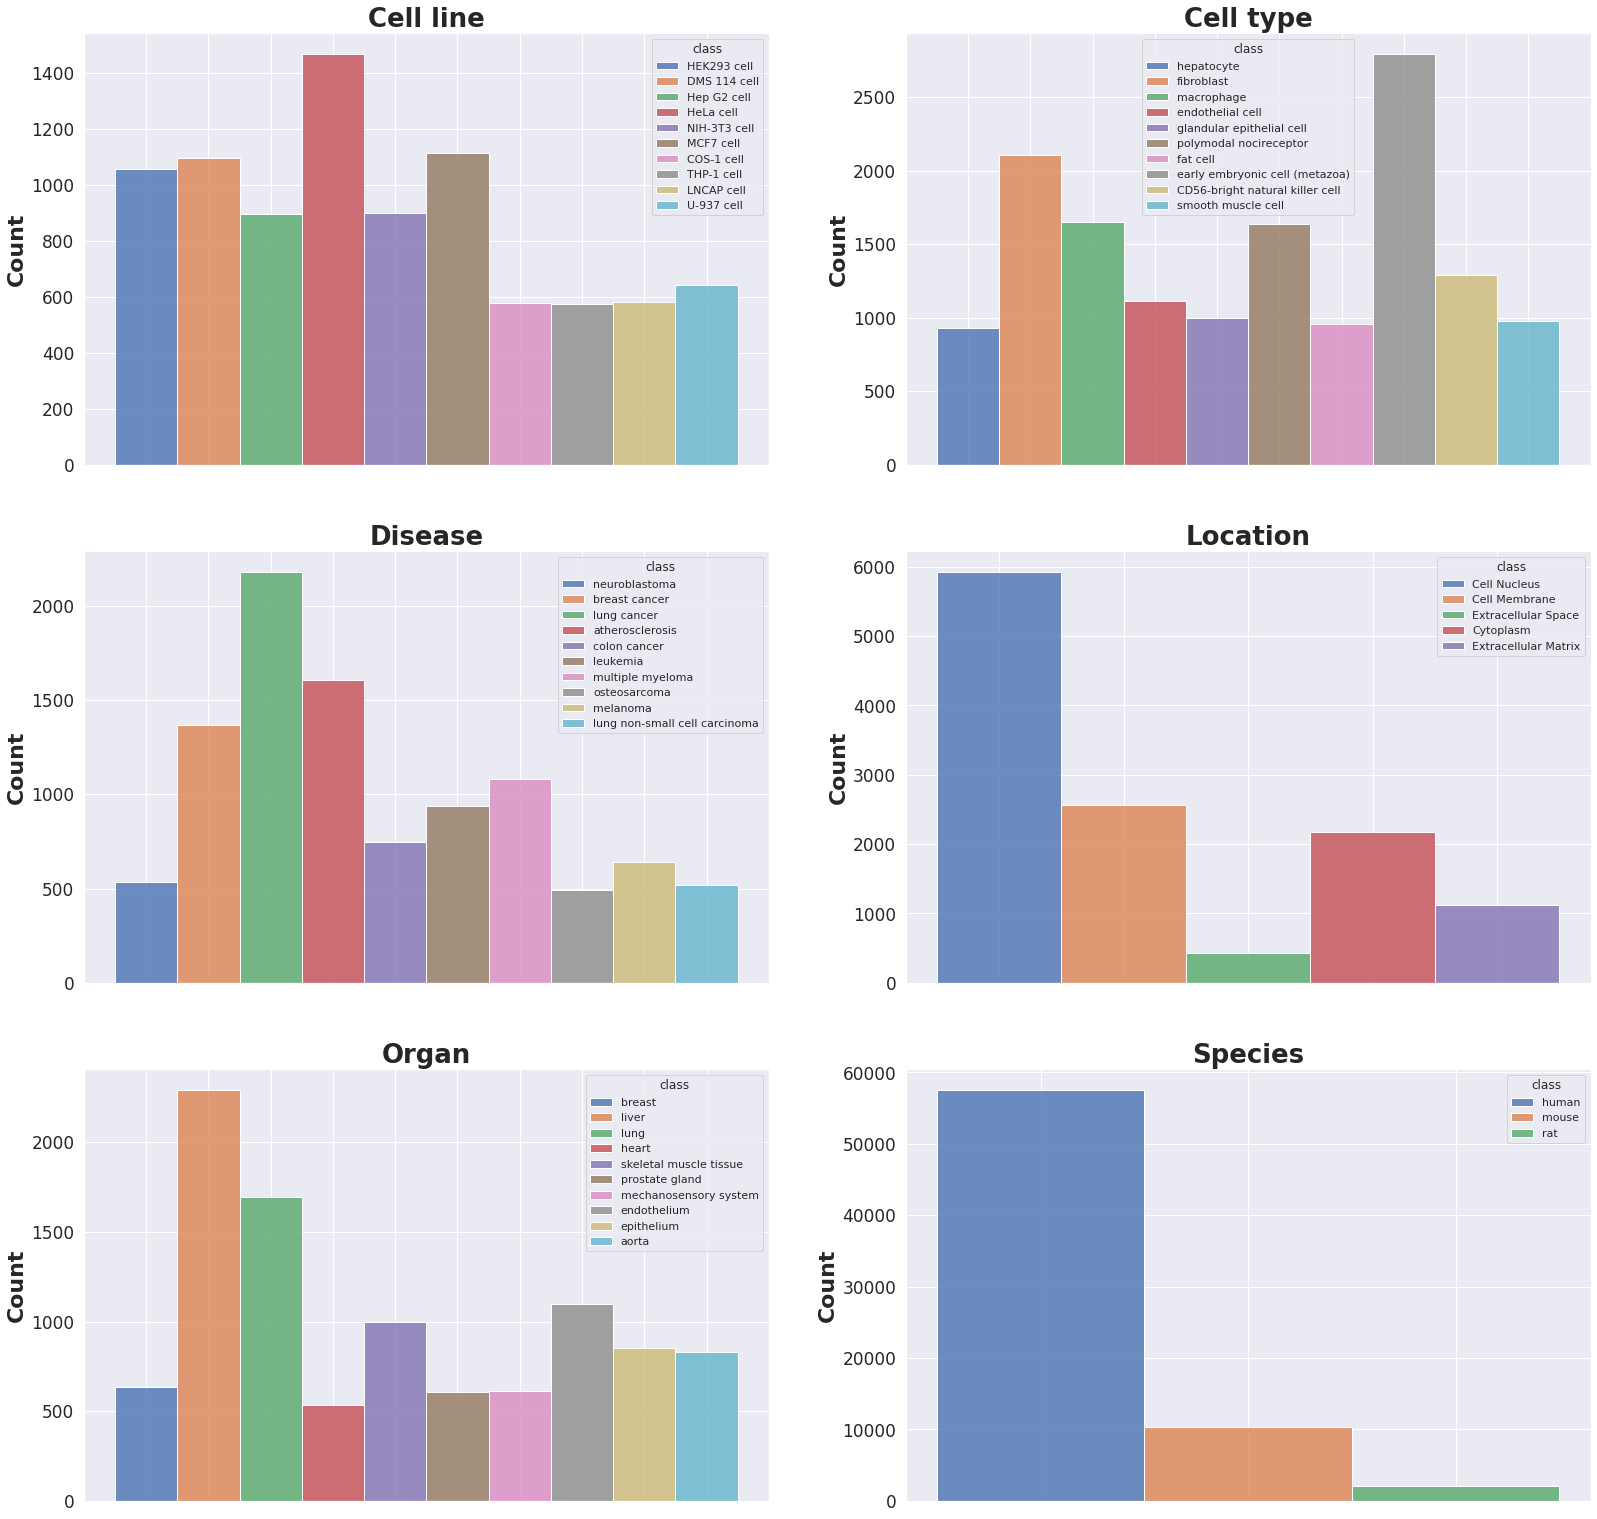

In [6]:
# Set style options
sns.set_style("whitegrid")
sns.set(font_scale=1)

# Names for plotting
names = ['Cell line', 'Cell type', 'Disease', 'Location', 'Organ', 'Species']

# One figure for all plots
fig, axes = plt.subplots(3, 2, figsize=(27,27))
indices_vertical = [0, 0, 1, 1, 2, 2]
indices_horizontal = [0, 1, 0, 1, 0, 1]

# Iterate through all dfs
for name, df, vertical, horizonal in zip(names, all_dfs, indices_vertical, indices_horizontal):
    class_plot = sns.histplot(df, x='class', hue='class', alpha=0.8, ax=axes[vertical][horizonal])
    class_plot.set(xticklabels=[], xlabel=None)
    class_plot.axes.set_title(name, fontsize=26, weight='bold')
    class_plot.axes.set_ylabel('Count', fontsize=22, weight='bold')
    class_plot.set_yticklabels(class_plot.get_yticks().astype('int'), size=17)

plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'class_dist.png'), dpi=300, bbox_inches = "tight")

## B) Plot for node and edge types

In [97]:
node_df = pd.DataFrame(node_types,index=['Count (log scale)']).transpose().reset_index(level=0).rename(columns={'index':'Class'})
relation_df = pd.DataFrame(relation_types,index=['Count (log scale)']).transpose().reset_index(level=0).rename(columns={'index':'Class'})
node_df

,Class,Count (log scale)
0,Complex,1036383
1,Protein,167460
2,Abundance,35003
3,Biological process,23668
4,Reaction,6977


No handles with labels found to put in legend.
<ipython-input-106-f43060de43c3>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  type_plot.set_yticklabels(type_plot.get_yticks().astype('int'), size=13)
<ipython-input-106-f43060de43c3>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  type_plot.set_yticklabels(type_plot.get_yticks().astype('int'), size=13)


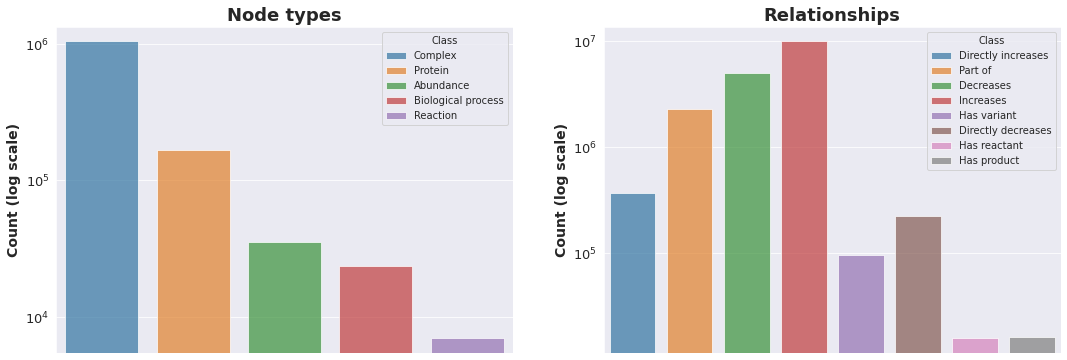

In [106]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(18,6))
titles = ["Node types", "Relationships"]

for idx, (type_df, title) in enumerate(zip([node_df, relation_df], titles)):
    type_plot = sns.barplot(
        data=type_df,
        x='Class',
        y='Count (log scale)',
        hue='Class',
        ax=axes[idx], 
        alpha=0.7,
        dodge=False,
    )
    plt.legend(loc='upper right', title='Class')
    type_plot.set(xticklabels=[], xlabel=None)
    type_plot.axes.set_title(title, fontsize=18, weight='bold')
    type_plot.axes.set_ylabel('Count (log scale)', fontsize=14, weight='bold')
    type_plot.set_yticklabels(type_plot.get_yticks().astype('int'), size=13)
    type_plot.set_yscale("log")

plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'node_relation_dist.png'), dpi=300, bbox_inches = "tight")